In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (12,8)
sns.set()
#plt.style.use("ggplot")
list_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

In [3]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"
total_population_csv = "../csvs/totalPopulationCountries.csv"
total_populationF_csv = "../csvs/totalPopulationF.csv"
total_populationM_csv = "../csvs/totalPopulationM.csv"
users_internet_csv = "../csvs/totalUsersInternet.csv"
gender_inequality_csv = "../csvs/genderInequality.csv"
employmentto_population_csv = "../csvs/employmenttoPopulationRatio(%ages15andOlder).csv"
positive_negative_csv = "../csvs/positiveNegativeData.csv"
climate_russia_csv = "../csvs/climateRussia.csv"
climate_sweden_csv = "../csvs/climateSweden.csv"

In [4]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv, sep=";")
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)
total_population_df = pd.read_csv(total_population_csv)
total_populationF_df = pd.read_csv(total_populationF_csv, sep=";")
total_populationM_df = pd.read_csv(total_populationM_csv, sep=";")
users_internet_df = pd.read_csv(users_internet_csv, sep=";")
gender_inequality_df = pd.read_csv(gender_inequality_csv)
employmentto_population_df = pd.read_csv(employmentto_population_csv)
positive_negative_df = pd.read_csv(positive_negative_csv, sep=";")
climate_russia_df = pd.read_csv(climate_russia_csv)
climate_sweden_df = pd.read_csv(climate_sweden_csv)

In [5]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()
total_population = total_population_df.copy()
total_populationF = total_populationF_df.copy()
total_populationM = total_populationM_df.copy()
users_internet = users_internet_df.copy()
gender_inequality = gender_inequality_df.copy()
employmentto_population = employmentto_population_df.copy()
positive_negative = positive_negative_df.copy()
climate_russia = climate_russia_df.copy()
climate_sweden = climate_sweden_df.copy()

In [6]:
#Fazendo drop em colunas que não serão ultilizadas.
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)
positive_negative.drop("Life Ladder", axis=1, inplace=True)
positive_negative.drop("Log GDP per capita", axis=1, inplace=True)
positive_negative.drop("Social support", axis=1, inplace=True)
positive_negative.drop("Healthy life expectancy at birth", axis=1, inplace=True)
positive_negative.drop("Freedom to make life choices", axis=1, inplace=True)
positive_negative.drop("Generosity", axis=1, inplace=True)
positive_negative.drop("Perceptions of corruption", axis=1, inplace=True)
positive_negative.drop("Confidence in national government", axis=1, inplace=True)
positive_negative.drop("Democratic Quality", axis=1, inplace=True)
positive_negative.drop("Delivery Quality", axis=1, inplace=True)
positive_negative.drop("Standard deviation of ladder by country-year", axis=1, inplace=True)
positive_negative.drop("Standard deviation/Mean of ladder by country-year", axis=1, inplace=True)
positive_negative.drop("GINI index (World Bank estimate)", axis=1, inplace=True)
positive_negative.drop("GINI index (World Bank estimate), average 2000-16", axis=1, inplace=True)
positive_negative.drop("gini of household income reported in Gallup, by wp5-year", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, Gallup", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1981-1984", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1989-1993", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1994-1998", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1999-2004", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 2005-2009", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 2010-2014", axis=1, inplace=True)
climate_russia.drop("ISO3", axis=1, inplace=True)
climate_sweden.drop("ISO3", axis=1, inplace=True)

In [7]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
add_continent = pd.merge(suicide,country_continent,on=["country"], how="inner")

#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
add_hdi = pd.merge(add_continent,hdi, on=["country","year"], how="inner")

#Adicionando a coluna de população total.
add_total_population = pd.merge(add_hdi,total_population, on=["country","year"], how="inner")

#Adicionando a coluna de população total Feminina.
add_total_populationF = pd.merge(add_total_population, total_populationF,on=["country","year"], how="inner")

#Adicionando a coluna de população total Masculina.
add_total_populationM = pd.merge(add_total_populationF, total_populationM,on=["country","year"], how="inner")

#Adicionando a coluna de total de usuários de internet.
add_users_internet = pd.merge(add_total_populationM, users_internet,on=["country","year"], how="inner")

#Adicionando a coluna de desigualdade de gênero.
add_gender_inequality = pd.merge(add_users_internet, gender_inequality,on=["country","year"], how="inner")

#Adicionando a coluna de taxa de empregados a partir de 15 anos.
add_employmentto_population = pd.merge(add_gender_inequality,employmentto_population,on=["country","year"], how="inner")

#Adicionando a coluna de afeto positivo e afeto negativo.
result = pd.merge(add_employmentto_population, positive_negative,on=["country","year"], how="inner")

In [8]:
russia_df= result[(result["country"] == "Russian Federation")]
sweden_df= result[(result["country"] == "Sweden") & (result["year"] > 2005)]

In [9]:
cr = climate_russia.groupby(["year","country"], as_index=False).median()
cs = climate_sweden.groupby(["year","country"], as_index=False).median()

In [10]:
russia = pd.merge(russia_df,cr,on=["country","year"], how="inner")
sweden = pd.merge(sweden_df,cs,on=["country","year"], how="inner")
russia.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,gdp-year,gdp-per-capita,continent,...,hdi,totalPopulation,totalPopulationFemale,totalPopulationMale,totalUsersInternet,genderInequality,rateEmployment15andOlder,positiveAffect,negativeAffect,temperature-(celsius)
0,Russian Federation,2010,male,75+ years,1506,2023458,74.43,1524916112079,11307,Europe,...,0.78,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
1,Russian Federation,2010,male,25-34 years,6508,11398127,57.10,1524916112079,11307,Europe,...,0.78,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
2,Russian Federation,2010,male,35-54 years,10304,19786280,52.08,1524916112079,11307,Europe,...,0.78,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
3,Russian Federation,2010,male,55-74 years,5178,11174530,46.34,1524916112079,11307,Europe,...,0.78,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
4,Russian Federation,2010,male,15-24 years,3934,10546669,37.30,1524916112079,11307,Europe,...,0.78,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272


In [11]:
russia_male = russia[(russia["sex"] == "male")]
russia_female = russia[(russia["sex"] == "female")]
sweden_male = sweden[(sweden["sex"] == "male")]
sweden_female = sweden[(sweden["sex"] == "female")]
russia_male. head(10)

,country,year,sex,age,suicides_no,population,suicides/100kpop,gdp-year,gdp-per-capita,continent,...,hdi,totalPopulation,totalPopulationFemale,totalPopulationMale,totalUsersInternet,genderInequality,rateEmployment15andOlder,positiveAffect,negativeAffect,temperature-(celsius)
0,Russian Federation,2010,male,75+ years,1506,2023458,74.43,1524916112079,11307,Europe,...,0.780,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
1,Russian Federation,2010,male,25-34 years,6508,11398127,57.10,1524916112079,11307,Europe,...,0.780,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
2,Russian Federation,2010,male,35-54 years,10304,19786280,52.08,1524916112079,11307,Europe,...,0.780,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
3,Russian Federation,2010,male,55-74 years,5178,11174530,46.34,1524916112079,11307,Europe,...,0.780,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
4,Russian Federation,2010,male,15-24 years,3934,10546669,37.30,1524916112079,11307,Europe,...,0.780,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
10,Russian Federation,2010,male,5-14 years,131,7012170,1.87,1524916112079,11307,Europe,...,0.780,142849449.0,76601805.0,66247644.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
12,Russian Federation,2011,male,75+ years,1485,2093449,70.94,2051661732060,15226,Europe,...,0.789,142960868.0,76657531.0,66303337.0,49.0,305.0,59.3,0.601348,0.165235,-2.4782
13,Russian Federation,2011,male,25-34 years,6011,11598196,51.83,2051661732060,15226,Europe,...,0.789,142960868.0,76657531.0,66303337.0,49.0,305.0,59.3,0.601348,0.165235,-2.4782
14,Russian Federation,2011,male,35-54 years,9411,19684905,47.81,2051661732060,15226,Europe,...,0.789,142960868.0,76657531.0,66303337.0,49.0,305.0,59.3,0.601348,0.165235,-2.4782
15,Russian Federation,2011,male,55-74 years,4892,11401026,42.91,2051661732060,15226,Europe,...,0.789,142960868.0,76657531.0,66303337.0,49.0,305.0,59.3,0.601348,0.165235,-2.4782


In [12]:
gr = russia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()
gs = sweden.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale"], as_index=False).sum()

In [13]:
gr.head()

,year,country,sex,totalPopulationFemale,totalPopulationMale,suicides_no,population,suicides/100kpop,gdp-year,gdp-per-capita,hdi,totalPopulation,totalUsersInternet,genderInequality,rateEmployment15andOlder,positiveAffect,negativeAffect,temperature-(celsius)
0,2010,Russian Federation,female,76601805.0,66247644.0,5795,72924753,50.09,9149496672474,67842,4.680,857096694.0,258.0,1866.0,350.4,3.533852,1.028526,-27.7632
1,2010,Russian Federation,male,76601805.0,66247644.0,27561,61941234,269.12,9149496672474,67842,4.680,857096694.0,258.0,1866.0,350.4,3.533852,1.028526,-27.7632
2,2011,Russian Federation,female,76657531.0,66303337.0,5568,72844705,49.30,12309970392360,91356,4.734,857765208.0,294.0,1830.0,355.8,3.608086,0.991410,-14.8692
3,2011,Russian Federation,male,76657531.0,66303337.0,25470,61901169,250.38,12309970392360,91356,4.734,857765208.0,294.0,1830.0,355.8,3.608086,0.991410,-14.8692
4,2012,Russian Federation,female,76764455.0,66437221.0,5454,72781138,47.56,13261541861670,98478,4.788,859210056.0,382.8,1764.0,360.0,3.666985,1.041627,-21.9663


In [14]:
myGroup = pd.merge(russia,sweden, how="outer")
myGroup = myGroup.groupby(["year","country","totalPopulation", "hdi","gdp-year","genderInequality","totalUsersInternet","rateEmployment15andOlder","positiveAffect",
                           "negativeAffect","temperature-(celsius)"], as_index=False).sum()
myGroup.head()

,year,country,totalPopulation,hdi,gdp-year,genderInequality,totalUsersInternet,rateEmployment15andOlder,positiveAffect,negativeAffect,temperature-(celsius),suicides_no,population,suicides/100kpop,gdp-per-capita,totalPopulationFemale,totalPopulationMale
0,2010,Russian Federation,142849449.0,0.780,1524916112079,311.0,43.0,58.4,0.588975,0.171421,-4.62720,33356,134865987,319.21,135684,919221660.0,794971728.0
1,2010,Sweden,9378126.0,0.905,488377689565,48.0,90.0,57.7,0.833033,0.200112,2.20141,1141,8823125,146.54,664224,56483388.0,56054124.0
2,2011,Russian Federation,142960868.0,0.789,2051661732060,305.0,49.0,59.3,0.601348,0.165235,-2.47820,31038,134745874,299.68,182712,919890372.0,795640044.0
3,2011,Sweden,9449213.0,0.906,563109663291,47.0,92.8,58.4,0.814561,0.179152,4.04162,1112,8884644,141.77,760560,56867088.0,56523468.0
4,2012,Russian Federation,143201676.0,0.798,2210256976945,294.0,63.8,60.0,0.611164,0.173604,-3.66105,29643,134668522,285.51,196956,921173460.0,797246652.0


In [15]:
#Pegando os países por suas sub-regiões.
australia_newzeland = result[(result["sub_region"] == "Australia and New Zealand")]
caribbean = result[(result["sub_region"] == "Caribbean")]
central_america = result[(result["sub_region"] == "Central America")]
central_asia = result[(result["sub_region"] == "Central Asia")]
eastern_africa = result[(result["sub_region"] == "Eastern Africa")]
eastern_asia = result[(result["sub_region"] == "Eastern Asia")]
eastern_europe = result[(result["sub_region"] == "Eastern Europe")]
melanesia = result[(result["sub_region"] == "Melanesia")]
micronesia = result[(result["sub_region"] == "Micronesia")]
northern_america = result[(result["sub_region"] == "Northern America")]
northern_europe = result[(result["sub_region"] == "Northern Europe")]
south_america = result[(result["sub_region"] == "South America")]
south_eastern_asia = result[(result["sub_region"] == "South-Eastern Asia")]
southern_africa = result[(result["sub_region"] == "Southern Africa")]
southern_asia = result[(result["sub_region"] == "Southern Asia")]
southern_europe = result[(result["sub_region"] == "Southern Europe")]
western_africa = result[(result["sub_region"] == "Western Africa")]
western_asia = result[(result["sub_region"] == "Western Asia")]
western_europe = result[(result["sub_region"] == "Western Europe")]

In [16]:
#Pegando os países por continentes
africa = result[(result["continent"] == "Africa")]
americas = result[(result["continent"] == "Americas")]
asia = result[(result["continent"] == "Asia")]
europe = result[(result["continent"] == "Europe")]
Oceania = result[(result["continent"] == "Oceania")]

In [17]:
group_sa = south_america.groupby(["year","country","hdi"], as_index=False).sum()
group_ee = eastern_europe.groupby(["year","country","hdi"], as_index=False).sum()

In [18]:
#Função para colocar valores nulos.
#Substitui valores nulos por 0
#Primeira apresentação
def insert_zero(df,start = 2000, end = 2016):
    country_list = list(df["country"].unique())
    for year in range(start,end):
        for country in country_list:
            if len(df[(df["country"] == country) & (df["year"] == year)]) == 0:
                df2 = pd.DataFrame({"country": [country], "year": [year], "hdi" : [0]})
                df = df.append(df2, ignore_index=True)
    return df


In [19]:
#Atribuindo os valores nulos ao dataframe.
#group_sa = insert_zero(group_sa)
#group_ee = insert_zero(group_ee)

In [20]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [21]:
#TESTE
#country_list = list(group_sa["country"].unique())
#country_hdi = list(group_sa["hdi"][group_sa["country"] == "Argentina"])
#country_year = list(group_sa["year"].unique())

In [22]:
#Função para gerar gráfico de idh.
#Primeira apresentação
''' def gerar_grafico_idh(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    df = df[(df["year"]>= start) & (df["year"] < end)]
    
    country_name = list(df["country"].unique())
    country_year = np.asarray([x for x in range(start,end)])
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        print(country_hdi)
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() '''

' def gerar_grafico_idh(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):\n    global list_colors\n    \n    plt.ylabel(axis_y)\n    plt.xlabel(axis_x)\n    plt.title(title)\n    ax = plt.subplot()\n    df = df[(df["year"]>= start) & (df["year"] < end)]\n    \n    country_name = list(df["country"].unique())\n    country_year = np.asarray([x for x in range(start,end)])\n    \n    list_num = axis_x_center(len(country_name))\n    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))\n    plt.xticks(country_year)\n    \n    for index in range(len(country_name)):\n        country_hdi = list(df["hdi"][df["country"] == country_name[index]])\n        print(country_hdi)\n        country_hdi = np.asarray(country_hdi)\n        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])\n        ax.legend(loc="upper left")\n\n\n    plt.show() '

In [23]:
#Função para gerar gráfico de taxa de suicídio.
#Primeira apresentação
'''
def gerar_grafico_suicide(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    df = df[(df["year"]>= start) & (df["year"] < end)]
    
    country_name = list(df["country"].unique())
    country_year = np.asarray([x for x in range(start,end)])
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/ df["population"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()'''

'\ndef gerar_grafico_suicide(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):\n    global list_colors\n    \n    plt.ylabel(axis_y)\n    plt.xlabel(axis_x)\n    plt.title(title)\n    ax = plt.subplot()\n    df = df[(df["year"]>= start) & (df["year"] < end)]\n    \n    country_name = list(df["country"].unique())\n    country_year = np.asarray([x for x in range(start,end)])\n    \n    list_num = axis_x_center(len(country_name)) \n    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))\n    plt.xticks(country_year)\n    \n    for index in range(len(country_name)):\n        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/ df["population"][df["country"] == country_name[index]])*100000)\n        country_list = np.asarray(country_list)\n        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])\n        ax.legend(loc="upper left")\

In [24]:
#Função para gerar gráfico de taxa de suicídio por gênero.
def generate_chart_suicide_gen(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#d62728","#2ca02c"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_sex = list(df["sex"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_sex)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationFemale"][df["sex"] == country_sex[index]])*100000)
            country_list = np.asarray(country_list)
        elif country_sex[index] == "male":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationMale"][df["sex"] == country_sex[index]])*100000)
            country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [25]:
#Função para gerar gráfico de taxa de suicídio por idade.
def generate_chart_suicide_age(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#7f7f7f","#9467bd","#8c564b","#e377c2","#bcbd22","#17becf"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-1)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_age)):
        country_list = list(df["suicides/100kpop"][df["age"] == country_age[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [26]:
#Função para gerar gráfico de taxa de suicídio total por país.
def generate_chart_suicide_total(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [27]:
#Função para gerar gráfico de taxa de idh total por país.
def generate_chart_hdi_total(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() 

In [28]:
#Função para gerar gráfico de Desigualdade de Gênero por país.
def generate_chart_gender_inequality(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["genderInequality"][df["country"] == country_name[index]])/1000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [29]:
#Função para gerar gráfico de taxa de usuários de internet por país.
def generate_chart_users_internet(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalUsersInternet"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [30]:
#Função para gerar gráfico de taxa de Empregados por país.
def generate_chart_employment(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["rateEmployment15andOlder"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [31]:
#Função para gerar gráfico do PIB por país.
def generate_chart_gdp_year(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["gdp-year"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [32]:
#Função para gerar gráfico de população total por país.
def generate_chart_total_pop(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalPopulation"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [33]:
#Função para gerar gráfico de taxa de PIB per capita por país.
def generate_chart_suicide_gdp_pc(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["gdp-year"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [34]:
#Função para gerar gráfico de media de temperatura por país.
def generate_chart_climate(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["temperature-(celsius)"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [35]:
#Função para gerar gráfico de media de temperatura por país.
def generate_chart_ap(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["positiveAffect"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [36]:
#Função para gerar gráfico de media de temperatura por país.
def generate_chart_an(df, axis_y, axis_x, title,wd = 0.15):
    list_colors = ["#1f77b4","#ff7f0e"]
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["negativeAffect"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


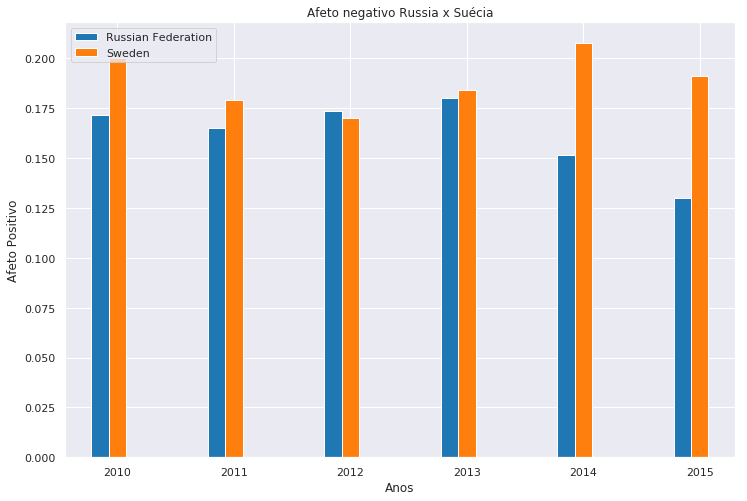

In [37]:
generate_chart_an(myGroup, "Afeto Positivo", "Anos", "Afeto negativo Russia x Suécia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


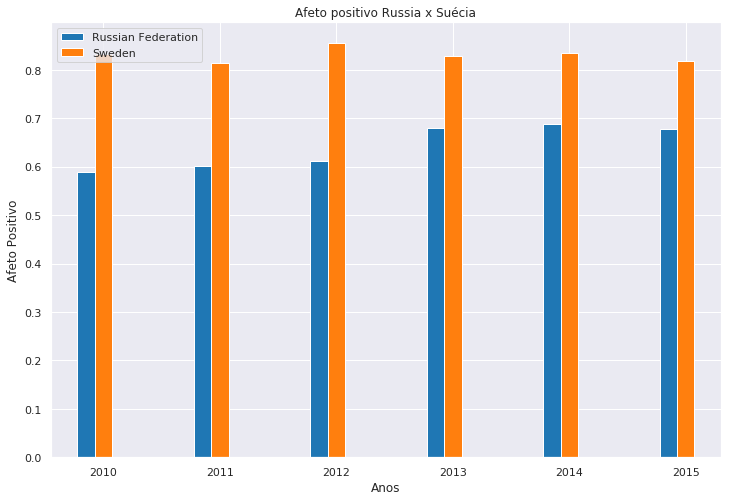

In [38]:
generate_chart_ap(myGroup, "Afeto Positivo", "Anos", "Afeto positivo Russia x Suécia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


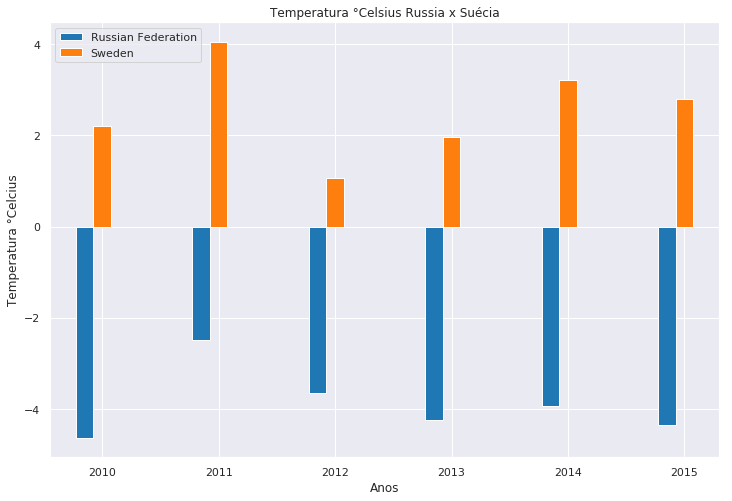

In [39]:
generate_chart_climate(myGroup, "Temperatura °Celcius", "Anos", "Temperatura °Celsius Russia x Suécia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


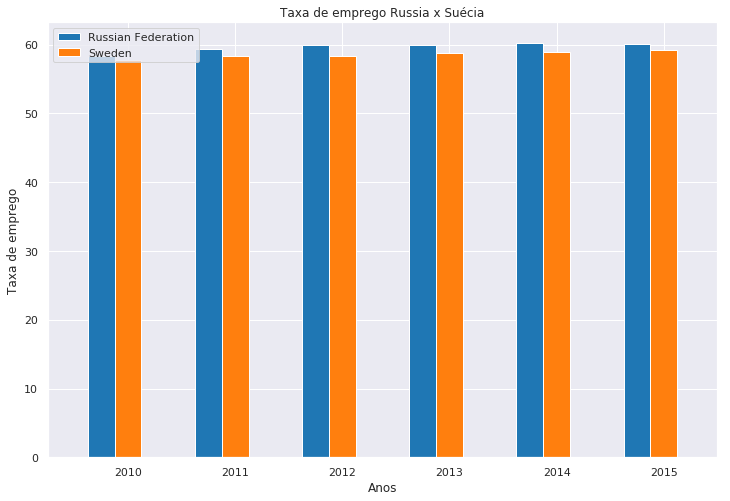

In [40]:
generate_chart_employment(myGroup, "Taxa de emprego", "Anos", "Taxa de emprego Russia x Suécia", 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


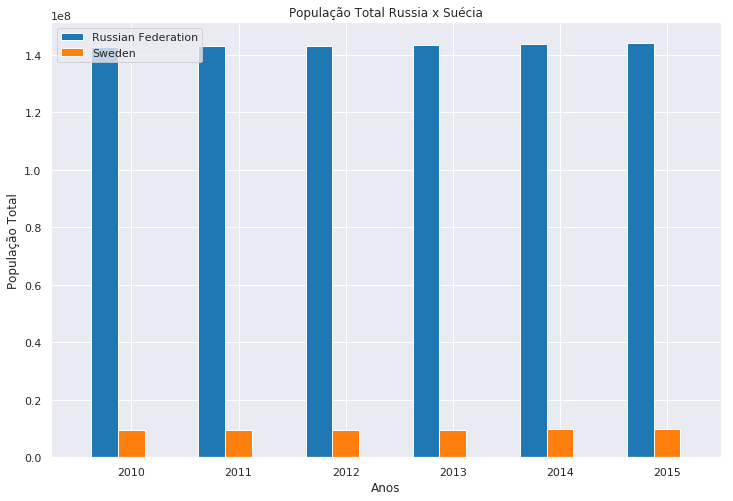

In [41]:
generate_chart_total_pop(myGroup, "População Total", "Anos", "População Total Russia x Suécia", 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


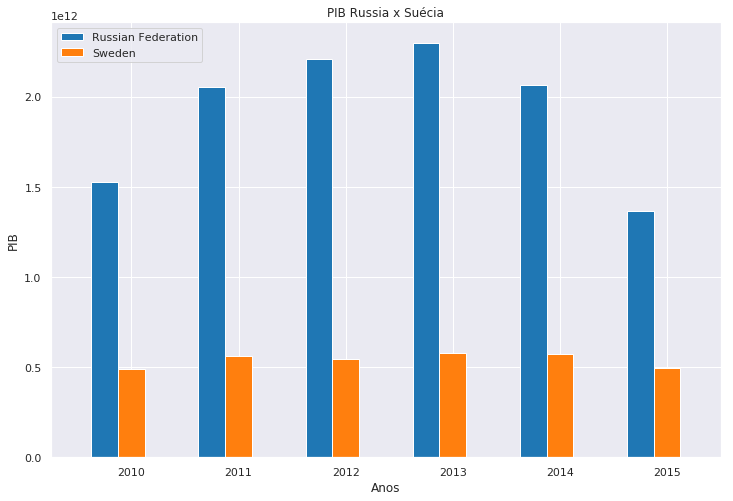

In [42]:
generate_chart_gdp_year(myGroup, "PIB", "Anos", "PIB Russia x Suécia", 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


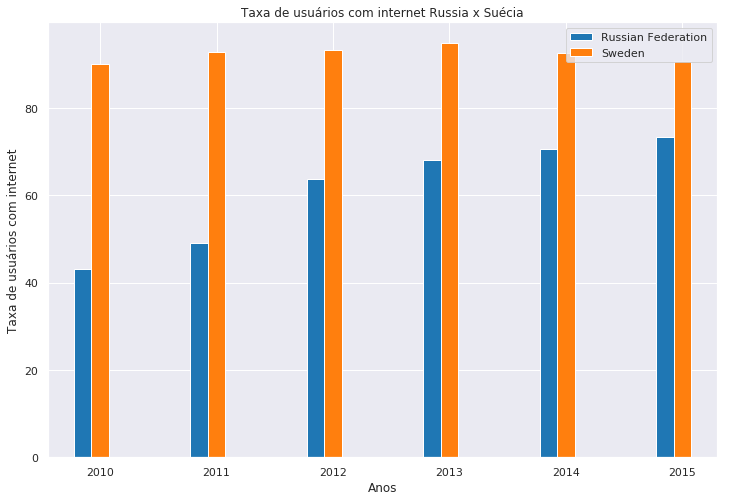

In [43]:
generate_chart_users_internet(myGroup, "Taxa de usuários com internet", "Anos", "Taxa de usuários com internet Russia x Suécia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


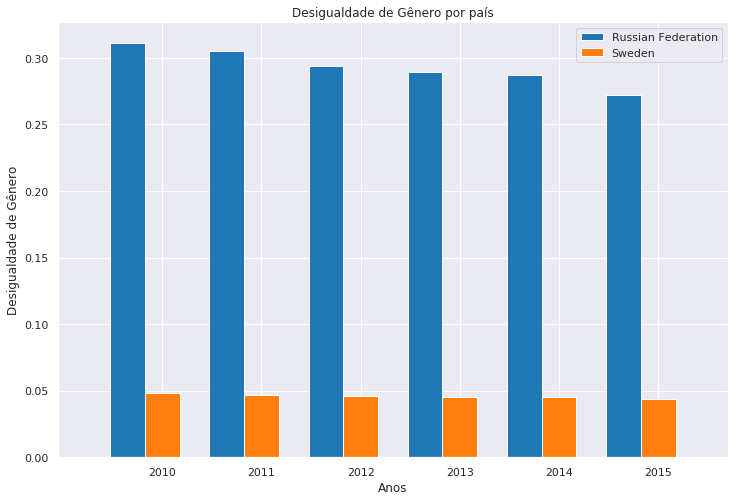

In [44]:
generate_chart_gender_inequality(myGroup, "Desigualdade de Gênero", "Anos", "Desigualdade de Gênero por país",0.35)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


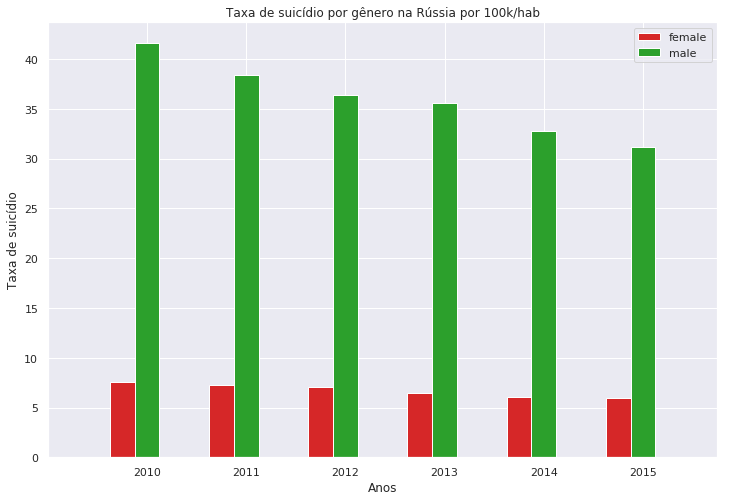

In [45]:
generate_chart_suicide_gen(gr, "Taxa de suicídio", "Anos", "Taxa de suicídio por gênero na Rússia por 100k/hab", 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


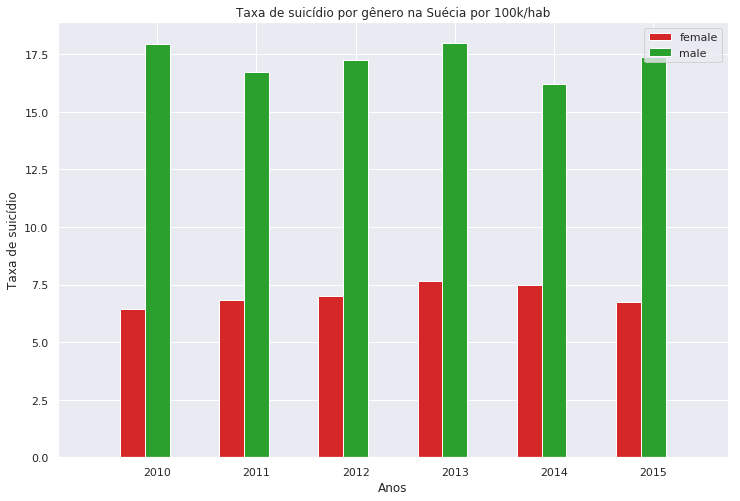

In [46]:
generate_chart_suicide_gen(gs, "Taxa de suicídio", "Anos", "Taxa de suicídio por gênero na Suécia por 100k/hab", 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


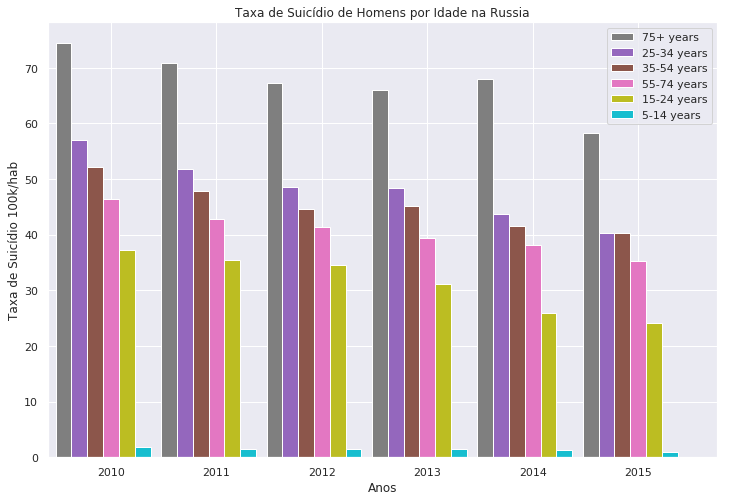

In [47]:
generate_chart_suicide_age(russia_male, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Homens por Idade na Russia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


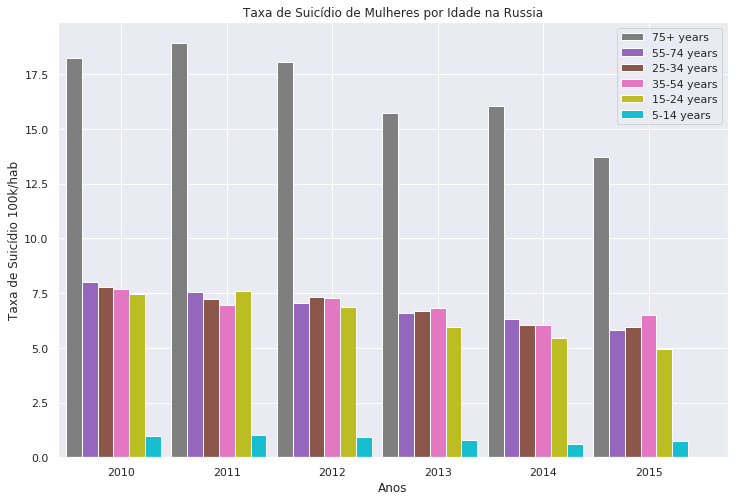

In [48]:
generate_chart_suicide_age(russia_female, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Mulheres por Idade na Russia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


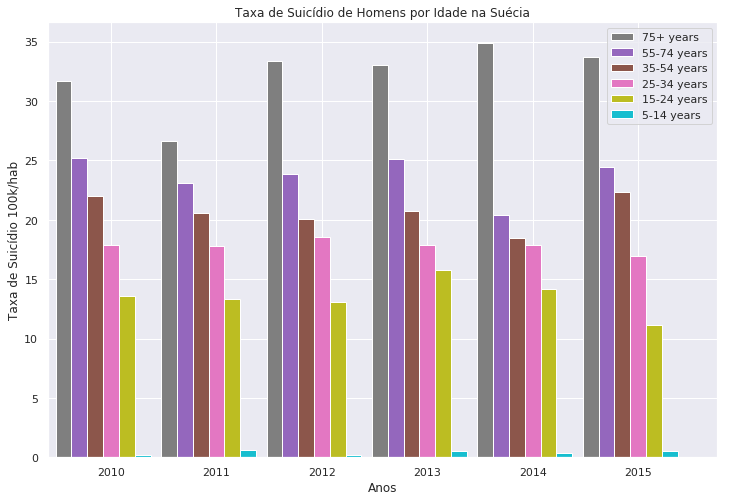

In [49]:
generate_chart_suicide_age(sweden_male, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Homens por Idade na Suécia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


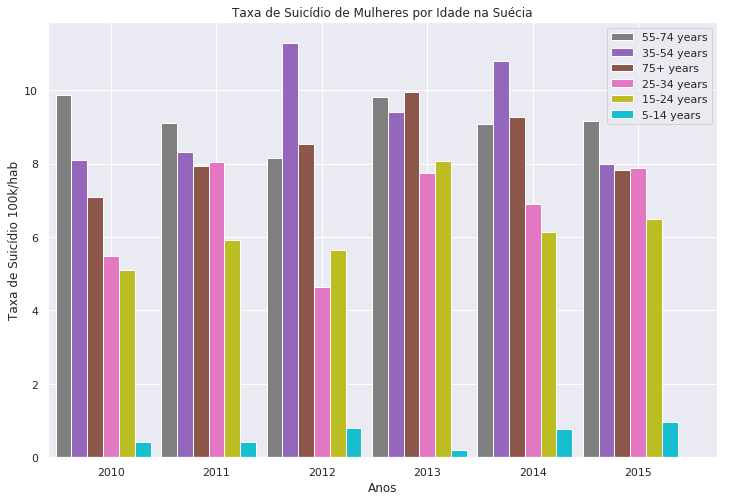

In [50]:
generate_chart_suicide_age(sweden_female, "Taxa de Suicídio 100k/hab", "Anos", "Taxa de Suicídio de Mulheres por Idade na Suécia")

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


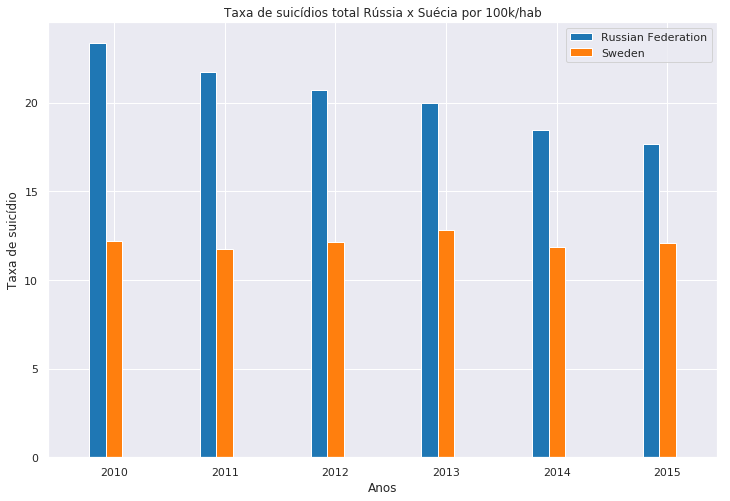

In [51]:
generate_chart_suicide_total(myGroup, 'Taxa de suicídio', 'Anos', 'Taxa de suicídios total Rússia x Suécia por 100k/hab')

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'country_list' is not defined

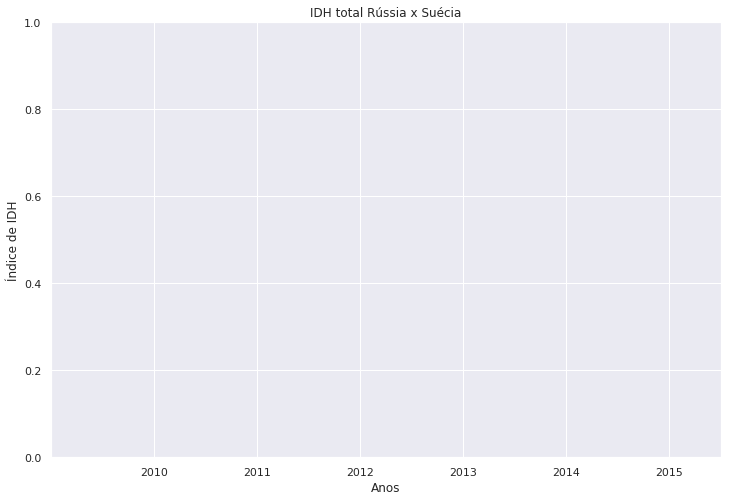

In [52]:
generate_chart_hdi_total(myGroup, "Índice de IDH", "Anos", "IDH total Rússia x Suécia", 0.25)

In [ ]:
generate_chart_suicide_gdp_pc(myGroup,"PIB per Capita","Anos","PIB per Capita Rússia x Suécia", 0.25)